# House Prices: Advanced Regression Techniques
https://www.kaggle.com/c/house-prices-advanced-regression-techniques#

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('data/train.csv', index_col='Id')
df_test = pd.read_csv('data/test.csv', index_col='Id')

### Validation

In [3]:
# Обработка целевой переменной
def get_y(y):
    y[y<0]=1
    return np.log(y)

In [4]:
# Отложенная выборка
def excerpt_validation(model, f_feature, df=df,  target_name='SalePrice'):
    X_train, X_valid, y_train, y_valid = train_test_split(df.drop(columns=target_name), 
                                                          df[target_name], test_size=0.3, random_state=17)
    model.fit(f_feature(X_train), y_train)
    train_preds = model.predict(f_feature(X_train))
    valid_preds = model.predict(f_feature(X_valid))
    
    print('Ошибка на трейне', mean_squared_error(get_y(y_train), get_y(train_preds), squared=False))
    print('Ошибка на тесте', mean_squared_error(get_y(y_valid), get_y(valid_preds), squared=False))

In [5]:
# Кросс-валидация
def scoring(model, X, y):
    model.fit(X, y)
    preds = model.predict(X)
    return mean_squared_error(get_y(y), get_y(preds), squared=False)

def cross_validation(model, f_feature, df=df, target_name='SalePrice'):
    X, y = df.drop(columns=target_name), df[target_name]
    return cross_val_score(model, f_feature(X), y, cv=5, scoring=scoring)

### Output answer

In [51]:
def output(model, f_feature, df=df, df_test=df_test, target_name='SalePrice'):
    X, y = df.drop(columns=target_name), df[target_name]
    model.fit(f_feature(X), y)
    preds = model.predict(f_feature(df_test))
    df_out = pd.DataFrame(df_test.index)
    df_out[target_name] = preds
    df_out=df_out.set_index('Id')
    df_out.to_csv('submission.csv')

### Baseline

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
def get_feature(df_in):
    df_out = df_in[df_in.columns[df_in.dtypes!='object']]
    df_out = df_out.fillna(0)
    return df_out

In [47]:
model = RandomForestRegressor(random_state=17)
excerpt_validation(model, get_feature)
cross_validation(model, get_feature)

Ошибка на трейне 0.06464307820721829
Ошибка на тесте 0.13888840863668722


array([0.06680687, 0.07623259, 0.06620669, 0.06139464, 0.07340081])

In [52]:
output(model, get_feature)

### New model

### Other

In [231]:
corr = pd.DataFrame()
corr['pearson'] = df.corr(method='pearson')['SalePrice']
corr['spearman'] = df.corr(method='spearman')['SalePrice']
corr['kendall'] = df.corr(method='kendall')['SalePrice']
corr.sort_values(by=['pearson'])

,pearson,spearman,kendall
KitchenAbvGr,-0.135907,-0.164826,-0.134718
EnclosedPorch,-0.128578,-0.218394,-0.172094
MSSubClass,-0.084284,0.007192,-0.003979
OverallCond,-0.077856,-0.129325,-0.103492
YrSold,-0.028923,-0.029899,-0.021796
LowQualFinSF,-0.025606,-0.067719,-0.055308
Id,-0.021917,-0.018546,-0.012030
MiscVal,-0.021190,-0.062727,-0.050917
BsmtHalfBath,-0.016844,-0.012189,-0.009962
BsmtFinSF2,-0.011378,-0.038806,-0.030710


In [262]:
corr[corr['pearson']>0.1].index

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch',
       'SalePrice'],
      dtype='object')

In [ ]:
tree_params = {'max_depth': range(2,11)}
locally_best_tree = GridSearchCV(tree, tree_params, cv=5, verbose=True)  # you code here                    
locally_best_tree.fit(X_train, y_train) # you code here 

In [ ]:
print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

In [ ]:
cross_val_score()

In [43]:
def get_auc_lr_valid(X, y, C=1.0, seed=17, ratio = 0.9):
    # Разделите данные наборы обучения и проверки
    idx = int(round(X.shape[0] * ratio))
    lr = LogisticRegression(C=C, random_state=seed, solver='liblinear').fit(X[:idx], y[:idx])
    y_pred = lr.predict_proba(X[idx:])
    score = roc_auc_score(y[idx:], y_pred)
    
    return score

In [44]:
get_auc_lr_valid(get_feature(X_train), y_train)

c:\users\stanislav.lyunchenko\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


ValueError: multi_class must be in ('ovo', 'ovr')

In [45]:
X, y = get_feature(X_train), y_train
C=1.0
seed=17
ratio = 0.9

idx = int(round(X.shape[0] * ratio))
lr = LogisticRegression(C=C, random_state=seed, solver='liblinear').fit(X[:idx], y[:idx])

c:\users\stanislav.lyunchenko\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [61]:
y_pred = lr.predict_proba(X[idx:])

In [62]:
y_pred[:, 1]

array([4.38043924e-38, 1.41027086e-49, 3.35002689e-51, 3.45893201e-35,
       1.91811731e-81, 2.82835265e-45, 4.53999761e-47, 4.73069849e-39,
       8.36708906e-48, 1.09457587e-61, 7.33877326e-45, 2.71602377e-35,
       5.18610802e-25, 9.50515514e-30, 1.76493424e-33, 2.69663596e-16,
       1.82185362e-27, 8.11890446e-55, 3.32864204e-41, 2.40002839e-42,
       8.65157320e-38, 6.52254945e-20, 1.07658123e-96, 7.27458881e-22,
       2.89353219e-37, 1.23809095e-19, 4.55374112e-50, 2.36027892e-26,
       9.69456150e-46, 6.68264283e-37, 2.79366057e-22, 3.33805282e-15,
       3.32752735e-32, 1.79472291e-34, 6.98510278e-52, 1.97003240e-16,
       1.69544170e-20, 2.13851644e-46, 1.47275380e-23, 4.42588511e-27,
       7.56869364e-45, 1.13358224e-32, 2.35270613e-21, 2.74040686e-68,
       1.42569312e-35, 1.61975546e-19, 1.13838243e-63, 1.99036171e-37,
       1.70836105e-08, 2.33303235e-41, 3.45716223e-23, 3.08561939e-19,
       1.12013106e-06, 9.09240490e-27, 1.57408570e-55, 4.22550922e-17,
      

In [63]:
y_pred

array([[1.66260716e-16, 4.38043924e-38, 5.69616572e-18, ...,
        4.22812545e-15, 3.32677597e-15, 6.01089901e-21],
       [1.70262441e-11, 1.41027086e-49, 1.46648317e-26, ...,
        5.55708314e-13, 7.80068748e-13, 1.47661765e-18],
       [1.54966634e-16, 3.35002689e-51, 5.39952672e-42, ...,
        2.68144661e-22, 1.11553712e-17, 1.02399424e-20],
       ...,
       [1.91211632e-10, 3.91327854e-44, 1.08344679e-28, ...,
        3.17099788e-23, 4.44429339e-14, 9.16332072e-17],
       [7.99942352e-14, 1.29098221e-28, 2.61013295e-19, ...,
        1.41229055e-10, 3.65570641e-10, 1.26267988e-17],
       [5.73168302e-13, 6.40360481e-32, 3.12730515e-19, ...,
        2.01369814e-12, 2.37379329e-10, 2.17963969e-13]])

In [49]:
idx

920

In [ ]:
train = pd.read_csv('data in/train.csv')

In [119]:
train_exist = train[train.columns[train.count()/train.shape[0]>0.8]]
train_exist.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [120]:
train_exist[train_exist.columns[train_exist.dtypes=='object']].columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [23]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
col_obj=[]
for col_name in train.columns[0]:
    

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [33]:
q =train['MSSubClass'].describe()
q

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [51]:
train.columns[train.dtypes==object]

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [42]:
q

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
def corr_heatmap(columns=None, saleprice=["SalePrice_log"], df=train
                 , figsize=(30,30), vmin=-1, vmax=1, showvalue=True):

    corr = df[columns].corr()
    plt.figure(figsize=figsize)
    return sns.heatmap(corr, vmin=vmin, vmax=vmax, annot=showvalue)


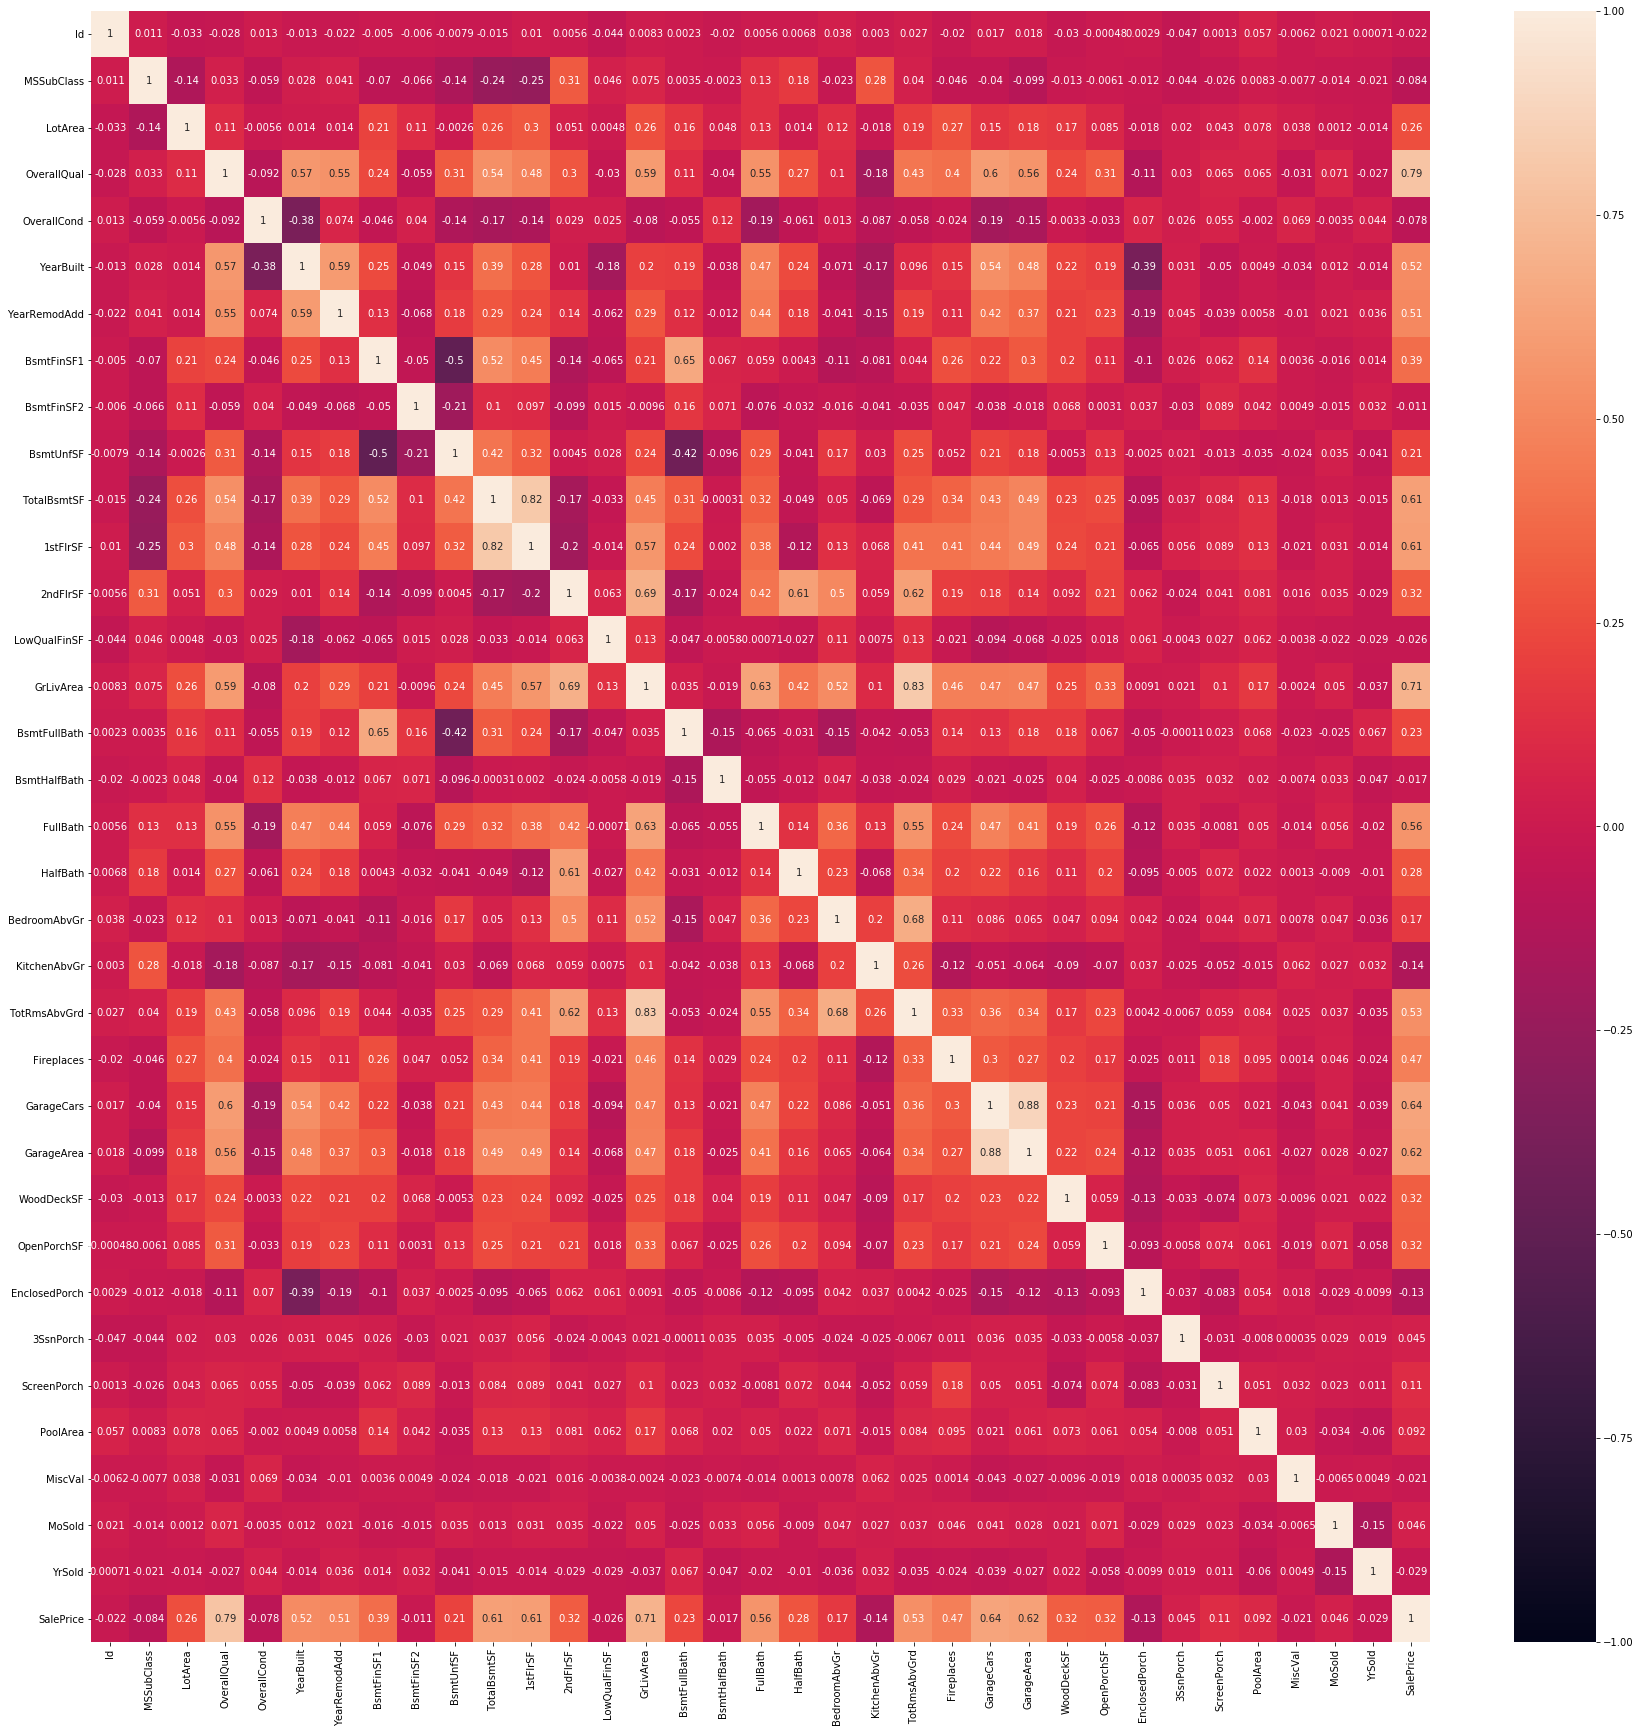

In [80]:
corr_heatmap(train.columns[train.dtypes=='int64'])

матрица корреляции: https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii

In [86]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
X = train[train.columns[train.dtypes=='object']]
y = train['SalePrice']

In [88]:
tree_first = DecisionTreeClassifier(max_depth=3, random_state=17)
tree_first.fit(X, y)

ValueError: could not convert string to float: 'RL'

In [ ]:
import graphviz
dot_data = export_graphviz(tree_first, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [84]:
train[train.columns[train.dtypes=='object']]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
